# 물체 탐지(Object detection) 2020 10 12 수정


# YOLO3로 물체 탐지

## YOLOv3 다운로드


In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
!pip uninstall -y keras
!pip install keras==2.2.4

import keras
print(keras.__version__)

Uninstalling Keras-2.3.1:
  Successfully uninstalled Keras-2.3.1
     |████████████████████████████████| 317kB 2.8MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


Using TensorFlow backend.


2.2.4


In [3]:
# 프로젝트 다운로드
%cd /content
!rm -rf darknet
!git clone https://github.com/pjreddie/darknet


/content
Cloning into 'darknet'...
remote: Enumerating objects: 5913, done.
remote: Total 5913 (delta 0), reused 0 (delta 0), pack-reused 5913
Receiving objects: 100% (5913/5913), 6.34 MiB | 4.37 MiB/s, done.
Resolving deltas: 100% (3915/3915), done.


In [4]:
# 빌드
%cd /content/darknet
!make

# 빌드된 실행파일 확인
!ls -al darknet

# 빌드 확인
!./darknet

/content/darknet
mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o

## 학습된 모델 파일 다운로드

In [5]:
%cd /content/darknet
!wget wget https://pjreddie.com/media/files/yolov3.weights

/content/darknet
--2020-10-12 06:05:25--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2020-10-12 06:05:25--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   178KB/s    in 38m 35s 

2020-10-12 06:44:02 (105 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]

FINISHED --2020-10-12 06:44:02--
Total wall clock time: 38m 37s
Downloaded: 1 files, 237M in 38m 35s (105 KB/s)


## darknet으로 물체 탐지 실행 - 건너 뛰고

In [40]:
%cd /content/darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

from IPython.display import Image
Image('predictions.jpg')

/content/darknet
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 ^C


# Python Keras로 물체 YOLO 탐지 실행

## Keras 변환 코드 다운로드


In [6]:
# 다운로드
%cd /content
!rm -rf keras-yolo3

!git clone https://github.com/qqwweee/keras-yolo3
  
# 다운로드된 디렉토리로 이동
%cd keras-yolo3

# 내용 확인
!pwd
!ls -al  

/content
Cloning into 'keras-yolo3'...
remote: Enumerating objects: 144, done.
remote: Total 144 (delta 0), reused 0 (delta 0), pack-reused 144
Receiving objects: 100% (144/144), 151.07 KiB | 290.00 KiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/keras-yolo3
/content/keras-yolo3
total 124
drwxr-xr-x 6 root root  4096 Oct 12 06:44 .
drwxr-xr-x 1 root root  4096 Oct 12 06:44 ..
-rw-r--r-- 1 root root  1323 Oct 12 06:44 coco_annotation.py
-rw-r--r-- 1 root root 10093 Oct 12 06:44 convert.py
-rw-r--r-- 1 root root  5707 Oct 12 06:44 darknet53.cfg
drwxr-xr-x 2 root root  4096 Oct 12 06:44 font
drwxr-xr-x 8 root root  4096 Oct 12 06:44 .git
-rw-r--r-- 1 root root  1201 Oct 12 06:44 .gitignore
-rw-r--r-- 1 root root  3482 Oct 12 06:44 kmeans.py
-rw-r--r-- 1 root root  1064 Oct 12 06:44 LICENSE
drwxr-xr-x 2 root root  4096 Oct 12 06:44 model_data
-rw-r--r-- 1 root root  4077 Oct 12 06:44 README.md
-rw-r--r-- 1 root root 10686 Oct 12 06:44 train_bottleneck.py
-rw-r--r-- 1 root root 

## YOLO3 모델 파일 카피


In [14]:
%cd /content/keras-yolo3

!cp /content/darknet/yolov3.weights ./

!ls -al yolov3.weights

/content/keras-yolo3
-rw-r--r-- 1 root root 248007048 Oct 12 06:55 yolov3.weights


## 모델 파일 변환

YOLO3 자체는 C/C++로 구현된 DarkNet 프레임웤으로 구현되어 있다. 

공개된 모델은 DarkNet의 포멧이다. 이를 Keras에서 사용할 수 있는 h5 포멧으로 변환한다.


- convert.py : 변환 실행 파일

- yolov3.cfg : Darknet에서 사용하는 모델 구조 정의 파일

- yolov3.weight : Darknet으로 학습된 모델 파일


실행 결과로 다음의 h5 파일로 변환된다.
 
- model/yolov3.h5 : 변환된 모델 파일


In [ ]:
!head -40 yolov3.cfg 

[net]
# Testing
batch=1
subdivisions=1
# Training
# batch=64
# subdivisions=16
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 500200
policy=steps
steps=400000,450000
scales=.1,.1

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

# Downsample

[convolutional]
batch_normalize=1
filters=64
size=3
stride=2
pad=1


In [15]:
#tiny  추가 (송미경 수정)
# 실행하기전 기존것이 있다면 삭제

!rm -rf yolov3-tiny.h5

# 실행 
%run convert.py yolov3-tiny.cfg yolov3.weights yolov3-tiny.h5

Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 16)
Parsing section maxpool_0
Parsing section convolutional_1
conv2d bn leaky (3, 3, 16, 32)
Parsing section maxpool_1
Parsing section convolutional_2
conv2d bn leaky (3, 3, 32, 64)
Parsing section maxpool_2
Parsing section convolutional_3
conv2d bn leaky (3, 3, 64, 128)
Parsing section maxpool_3
Parsing section convolutional_4
conv2d bn leaky (3, 3, 128, 256)
Parsing section maxpool_4
Parsing section convolutional_5
conv2d bn leaky (3, 3, 256, 512)
Parsing section maxpool_5
Parsing section convolutional_6
conv2d bn leaky (3, 3, 512, 1024)
Parsing section convolutional_7
conv2d bn leaky (1, 1, 1024, 256)
Parsing section convolutional_8
conv2d bn leaky (3, 3, 256, 512)
Parsing section convolutional_9
conv2d    linear (1, 1, 512, 255)
Parsing section yolo_0
Parsing section route_0
Parsing section convolutional_10


In [16]:
# 실행하기전 기존것이 있다면 삭제
!rm -rf yolov3.h5

# 실행 
%run convert.py yolov3.cfg yolov3.weights yolov3.h5

Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)
Parsing section convolutional_1
conv2d bn leaky (3, 3, 32, 64)
Parsing section convolutional_2
conv2d bn leaky (1, 1, 64, 32)
Parsing section convolutional_3
conv2d bn leaky (3, 3, 32, 64)
Parsing section shortcut_0
Parsing section convolutional_4
conv2d bn leaky (3, 3, 64, 128)
Parsing section convolutional_5
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_6
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_1
Parsing section convolutional_7
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_8
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_2
Parsing section convolutional_9
conv2d bn leaky (3, 3, 128, 256)
Parsing section convolutional_10
conv2d bn leaky (1, 1, 256, 128)
Parsing section convolutional_11
conv2d bn leaky (3, 3, 128, 256)
Parsing section shortcut_3
Parsi

## 모델구조 보기 - 건너 뛰고

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


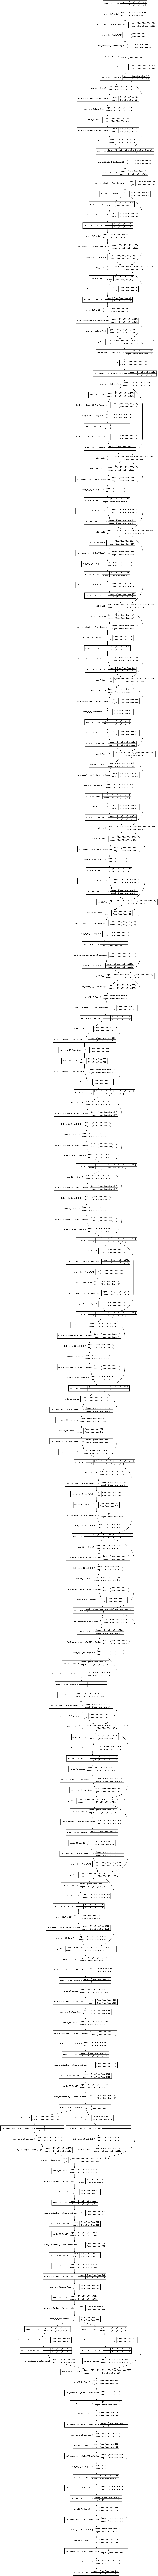

In [ ]:
from keras.models import load_model
from keras.utils.vis_utils import plot_model

# 모델 파일 로딩
model = load_model('yolov3.h5')

# 구조를 이미지로 저장
plot_model(model, show_shapes=True, to_file='yolo3_structure.png')

from IPython.display import Image
Image('yolo3_structure.png')



## 탐지 대상 이미지 다운로드


In [ ]:
#!wget -O street_view.jpg http://beltlineorg-wpengine.netdna-ssl.com/wp-content/uploads/2012/12/IMG_5669-flickr-websized.jpg

from IPython.display import Image, display
#display(Image(filename='street_view.jpg')) 

## 물체 탐지 실행

다음의 파일이 필요하다.
- yolov3.h5 : 모델 파일
- model_data/coco_classes.txt : 클래스 이름


In [ ]:
!cat model_data/coco_classes.txt

In [ ]:
from IPython.display import display 
from PIL import Image
from yolo import YOLO

def do_object_detection(file, model_path, class_path):
  
  yolo = YOLO(model_path=model_path, classes_path=class_path)

  # 이미지 로딩
  image = Image.open(file)

  # 실행
  result_image = yolo.detect_image(image)

  # 실행 결과 표시
  display(result_image)


In [ ]:
do_object_detection('street_view.jpg', 'yolov3.h5', 'model_data/coco_classes.txt')



NameError: ignored

# 커스텀 데이터 적용


## 커스텀 데이터 업로드

In [17]:
# 파일이름 resize_data.zip

%cd /content/keras-yolo3

! pip install gdown
! gdown https://drive.google.com/uc?id=1mSAv7Afqjt2z6cHlQFh6GAMoLitPAdjJ

/content/keras-yolo3
Downloading...
From: https://drive.google.com/uc?id=1mSAv7Afqjt2z6cHlQFh6GAMoLitPAdjJ
To: /content/keras-yolo3/resize_data.zip
31.6MB [00:00, 148MB/s] 


In [ ]:
# 드라이브와 연결, 건너뜀

%cd /content/keras-yolo3

from google.colab import files

# 파일이름 resize_data.zip
uploaded = files.upload()

!ls -al 

/content/keras-yolo3


Saving dental_image_in_voc_format.zip to dental_image_in_voc_format.zip
total 612932
drwxr-xr-x 7 root root      4096 Aug  1 04:10 .
drwxr-xr-x 1 root root      4096 Aug  1 04:06 ..
-rw-r--r-- 1 root root      1323 Aug  1 04:06 coco_annotation.py
-rw-r--r-- 1 root root     10093 Aug  1 04:06 convert.py
-rw-r--r-- 1 root root      5707 Aug  1 04:06 darknet53.cfg
-rw-r--r-- 1 root root 130809183 Aug  1 04:35 dental_image_in_voc_format.zip
drwxr-xr-x 2 root root      4096 Aug  1 04:06 font
drwxr-xr-x 8 root root      4096 Aug  1 04:06 .git
-rw-r--r-- 1 root root      1201 Aug  1 04:06 .gitignore
-rw-r--r-- 1 root root      3482 Aug  1 04:06 kmeans.py
-rw-r--r-- 1 root root      1064 Aug  1 04:06 LICENSE
drwxr-xr-x 2 root root      4096 Aug  1 04:06 model_data
drwxr-xr-x 2 root root      4096 Aug  1 04:10 __pycache__
-rw-r--r-- 1 root root      4077 Aug  1 04:06 README.md
-rw-r--r-- 1 root root     10686 Aug  1 04:06 train_bottleneck.py
-rw-r--r-- 1 root root      8332 Aug  1 04:06 train.p

In [18]:
#zip 압축 파일 풀기 # 파일이름 resize_data.zip

!mkdir resize_data

!unzip resize_data.zip -d ./resize_data

mkdir: cannot create directory ‘resize_data’: File exists
Archive:  resize_data.zip
  inflating: ./resize_data/Annotations/resize_Cell_P1_0017.xml  
  inflating: ./resize_data/Annotations/resize_Cell_P1_0019.xml  
  inflating: ./resize_data/Annotations/resize_Cell_P1_0021.xml  
  inflating: ./resize_data/Annotations/resize_Cell_P1_0022.xml  
  inflating: ./resize_data/Annotations/resize_Cell_P1_0023.xml  
  inflating: ./resize_data/Annotations/resize_Cell_P1_0025.xml  
  inflating: ./resize_data/Annotations/resize_Cell_P1_0028.xml  
  inflating: ./resize_data/Annotations/resize_Cell_P1_0029.xml  
  inflating: ./resize_data/Annotations/resize_Cell_P1_0032.xml  
  inflating: ./resize_data/Annotations/resize_Cell_P1_0034.xml  
  inflating: ./resize_data/Annotations/resize_Cell_P1_0038.xml  
  inflating: ./resize_data/Annotations/resize_Cell_P1_0040.xml  
  inflating: ./resize_data/Annotations/resize_Cell_P1_0041.xml  
  inflating: ./resize_data/Annotations/resize_Cell_P1_0042.xml  
  infl

In [ ]:
# zip 파일로 올려서 스킵
# 압축 풀기
#!tar xvfz dental_image_in_voc_format.tar.gz

# 확인
#!ls -al dental_image_in_voc_format.tar.gz

In [19]:
# 압출 풀린 파일들 확인
!ls -al resize_data

total 84
drwxr-xr-x 4 root root  4096 Oct 12 07:07 .
drwxr-xr-x 8 root root  4096 Oct 12 07:07 ..
drwxr-xr-x 2 root root 36864 Oct 12 07:07 Annotations
-rw-r--r-- 1 root root    32 Oct 12  2020 classes.txt
drwxr-xr-x 2 root root 36864 Oct 12 07:07 JPEGImages


## VOC 포멧의 레이블링 데이터를  darknet 포멧으로 변경

In [20]:
# copy and modified from voc_annotation.py

import xml.etree.ElementTree as ET
from os import getcwd
import glob


def convert_voc_2_darknet(data_folder_name, converted_file_name):
  
  def load_classes():
      with open('%s/classes.txt'%(data_folder_name)) as f:
          classes = f.read().splitlines()

      return classes

  def convert_annotation(image_id, converted_file):
      tree=ET.parse('%s/Annotations/%s.xml'%(data_folder_name, image_id))
      root = tree.getroot()

      for obj in root.iter('object'):
          difficult = obj.find('difficult').text
          cls = obj.find('name').text
          if cls not in classes or int(difficult)==1:
              continue
          cls_id = classes.index(cls)
          xmlbox = obj.find('bndbox')
          b = (int(xmlbox.find('xmin').text), int(xmlbox.find('ymin').text), int(xmlbox.find('xmax').text), int(xmlbox.find('ymax').text))
          converted_file.write(" " + ",".join([str(a) for a in b]) + ',' + str(cls_id))

  # classes = ['tooth', 'decayed', 'cured']
  classes = load_classes()


  # image_ids = ['101', '102', ... '305']
  image_ids = [ f.replace(".xml", "").replace("%s/Annotations/"%(data_folder_name), "") for f in glob.glob('%s/Annotations/*.xml'%(DATA_FOLDER_NAME))]


  wd = getcwd()


  converted_file = open(converted_file_name, 'w')
  for image_id in image_ids:
      converted_file.write('%s/JPEGImages/%s.jpg'%(data_folder_name, image_id))
      convert_annotation(image_id, converted_file)
      converted_file.write('\n')
  converted_file.close()


DATA_FOLDER_NAME = "resize_data"
CONVERTED_FILE_NAME = "train_all.txt"

convert_voc_2_darknet(DATA_FOLDER_NAME, CONVERTED_FILE_NAME)


In [21]:
!ls -al train_all.txt
!head -10 train_all.txt

-rw-r--r-- 1 root root 148896 Oct 12 07:08 train_all.txt
resize_data/JPEGImages/resize_Cell_P3_0037.jpg 69,171,115,247,2 160,97,229,155,2 140,28,210,97,2 20,17,78,103,2 354,244,445,378,3 36,287,108,334,0 208,301,263,359,0 225,370,262,436,0 293,378,349,447,0
resize_data/JPEGImages/resize_Cell_P1_0187.jpg 171,310,243,422,3 182,268,261,320,0 290,371,343,431,3 3,119,41,176,0 0,264,22,346,0
resize_data/JPEGImages/resize_Cell_P2_0201.jpg 141,139,195,230,2 296,231,343,274,0 253,282,297,353,2 328,272,359,315,3 289,298,346,395,2 368,346,416,410,0 410,230,444,298,3 422,133,444,193,0 315,81,418,249,2 212,10,259,51,0
resize_data/JPEGImages/resize_Cell_P1_0267.jpg 94,140,140,214,0 82,71,106,135,0 61,83,85,143,0 218,21,262,77,0 306,31,326,59,3 274,5,297,42,3 285,160,321,186,0 317,180,348,210,0 372,152,391,208,0 354,196,381,230,0 297,239,316,279,0 307,393,345,432,0 241,426,283,461,0 69,352,103,417,3 5,340,21,396,0 19,372,72,422,2 215,91,243,122,3 344,127,369,176,3 314,243,334,290,0 321,239,346,286,0 

In [22]:
# copy and modified from train.py

"""
Retrain the YOLO model for your own dataset.
"""

import numpy as np
import keras.backend as K
from keras.layers import Input, Lambda
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

from yolo3.model import preprocess_true_boxes, yolo_body, tiny_yolo_body, yolo_loss
from yolo3.utils import get_random_data


def _main():
#    annotation_path = 'train.txt'
    annotation_path = 'train_all.txt' # Modified
    log_dir = 'logs/000/'
#    classes_path = 'model_data/voc_classes.txt' # Modified    
    classes_path = 'resize_data/classes.txt'
    anchors_path = 'model_data/yolo_anchors.txt'
    class_names = get_classes(classes_path)
    num_classes = len(class_names)
    anchors = get_anchors(anchors_path)

#------------------------------------------------------------------------------------- 이미지 사이즈를 수정함 2020 10 12
    input_shape = (416, 416) # multiple of 32, hw

    is_tiny_version = len(anchors)==6 # default setting
    if is_tiny_version:
        model = create_tiny_model(input_shape, anchors, num_classes,
#            freeze_body=2, weights_path='model_data/tiny_yolo_weights.h5')
            freeze_body=2, weights_path='yolov3_tiny.h5') # Modified
    else:
        model = create_model(input_shape, anchors, num_classes,
#            freeze_body=2, weights_path='model_data/yolo_weights.h5')
            freeze_body=2, weights_path='yolov3.h5') # Modified

    logging = TensorBoard(log_dir=log_dir)
    checkpoint = ModelCheckpoint(log_dir + 'ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
        monitor='val_loss', save_weights_only=True, save_best_only=True, period=3)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)

    val_split = 0.1
    with open(annotation_path) as f:
        lines = f.readlines()
    np.random.seed(10101)
    np.random.shuffle(lines)
    np.random.seed(None)
    num_val = int(len(lines)*val_split)
    num_train = len(lines) - num_val

    # Train with frozen layers first, to get a stable loss.
    # Adjust num epochs to your dataset. This step is enough to obtain a not bad model.
    if True:
        model.compile(optimizer=Adam(lr=1e-3), loss={
            # use custom yolo_loss Lambda layer.
            'yolo_loss': lambda y_true, y_pred: y_pred})

        # batch_size = 32
        batch_size = 16
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
                steps_per_epoch=max(1, num_train//batch_size),
                validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
                validation_steps=max(1, num_val//batch_size),
                epochs=50,
                initial_epoch=0,
                callbacks=[logging, checkpoint])
        model.save_weights(log_dir + 'trained_weights_stage_1.h5')

    # Unfreeze and continue training, to fine-tune.
    # Train longer if the result is not good.
    if True:
        for i in range(len(model.layers)):
            model.layers[i].trainable = True
        model.compile(optimizer=Adam(lr=1e-4), loss={'yolo_loss': lambda y_true, y_pred: y_pred}) # recompile to apply the change
        print('Unfreeze all of the layers.')

        # batch_size = 32 # note that more GPU memory is required after unfreezing the body
        batch_size = 16 # note that more GPU memory is required after unfreezing the body
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
            steps_per_epoch=max(1, num_train//batch_size),
            validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
            validation_steps=max(1, num_val//batch_size),
            epochs=100,
            initial_epoch=50,
            callbacks=[logging, checkpoint, reduce_lr, early_stopping])
        model.save_weights(log_dir + 'trained_weights_final.h5')

    # Further training if needed.


def get_classes(classes_path):
    '''loads the classes'''
    with open(classes_path) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]
    return class_names

def get_anchors(anchors_path):
    '''loads the anchors from a file'''
    with open(anchors_path) as f:
        anchors = f.readline()
    anchors = [float(x) for x in anchors.split(',')]
    return np.array(anchors).reshape(-1, 2)


def create_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
  #          weights_path='model_data/yolo_weights.h5'):
              weights_path='yolov3.h5'): # Modified
    '''create the training model'''
    K.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16, 2:8}[l], w//{0:32, 1:16, 2:8}[l], \
        num_anchors//3, num_classes+5)) for l in range(3)]

    model_body = yolo_body(image_input, num_anchors//3, num_classes)
    print('Create YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze darknet53 body or freeze all but 3 output layers.
            num = (185, len(model_body.layers)-3)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.5})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def create_tiny_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
           # weights_path='model_data/tiny_yolo_weights.h5'):
              weights_path='yolov3_tiny.h5'): # modified
    '''create the training model, for Tiny YOLOv3'''
    K.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16}[l], w//{0:32, 1:16}[l], \
        num_anchors//2, num_classes+5)) for l in range(2)]

    model_body = tiny_yolo_body(image_input, num_anchors//2, num_classes)
    print('Create Tiny YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze the darknet body or freeze all but 2 output layers.
            num = (20, len(model_body.layers)-2)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.7})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes):
    '''data generator for fit_generator'''
    n = len(annotation_lines)
    i = 0
    while True:
        image_data = []
        box_data = []
        for b in range(batch_size):
            if i==0:
                np.random.shuffle(annotation_lines)
            image, box = get_random_data(annotation_lines[i], input_shape, random=True)
            image_data.append(image)
            box_data.append(box)
            i = (i+1) % n
        image_data = np.array(image_data)
        box_data = np.array(box_data)
        y_true = preprocess_true_boxes(box_data, input_shape, anchors, num_classes)
        yield [image_data, *y_true], np.zeros(batch_size)

def data_generator_wrapper(annotation_lines, batch_size, input_shape, anchors, num_classes):
    n = len(annotation_lines)
    if n==0 or batch_size<=0: return None
    return data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes)

_main()




Create YOLOv3 model with 9 anchors and 4 classes.
Load weights yolov3.h5.
Freeze the first 249 layers of total 252 layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 647 samples, val on 71 samples, with batch size 16.




Epoch 1/50
40/40 [==============================] - 64s 2s/step - loss: 3659.7717 - val_loss: 5624.0311

Epoch 2/50
40/40 [==============================] - 50s 1s/step - loss: 989.2209 - val_loss: 5130.6757
Epoch 3/50
40/40 [==============================] - 52s 1s/step - loss: 555.8637 - val_loss: 4990.0669
Epoch 4/50
40/40 [==============================] - 37s 936ms/step - loss: 400.2578 - val_loss: 4758.6147
Epoch 5/50
40/40 [==============================] - 52s 1s/step - loss: 318.1122 - val_loss: 4626.8894
Epoch 6/50
40/40 [==============================] - 52s 1s/step - loss: 268.9064 - val_loss: 4612.4150
Epoch 7/50
40/40 [==============================] - 52s 1s/step - loss: 239.6960 - val_loss:

In [23]:
!ls -al logs/000

total 2909276
drwxr-xr-x 2 root root      4096 Oct 12 08:37 .
drwxr-xr-x 3 root root      4096 Oct 12 07:28 ..
-rw-r--r-- 1 root root 246931600 Oct 12 07:32 ep003-loss555.864-val_loss4990.067.h5
-rw-r--r-- 1 root root 246931600 Oct 12 07:34 ep006-loss268.906-val_loss4612.415.h5
-rw-r--r-- 1 root root 246931600 Oct 12 07:37 ep009-loss198.962-val_loss4423.171.h5
-rw-r--r-- 1 root root 246931600 Oct 12 07:39 ep012-loss173.059-val_loss4283.117.h5
-rw-r--r-- 1 root root 246931600 Oct 12 08:14 ep051-loss112.460-val_loss119.216.h5
-rw-r--r-- 1 root root 246931600 Oct 12 08:17 ep054-loss95.627-val_loss103.632.h5
-rw-r--r-- 1 root root 246931600 Oct 12 08:19 ep057-loss88.983-val_loss101.443.h5
-rw-r--r-- 1 root root 246931600 Oct 12 08:22 ep060-loss86.044-val_loss100.036.h5
-rw-r--r-- 1 root root 246931600 Oct 12 08:25 ep063-loss82.634-val_loss89.392.h5
-rw-r--r-- 1 root root 246931600 Oct 12 08:28 ep066-loss81.972-val_loss81.182.h5
-rw-r--r-- 1 root root   4889174 Oct 12 08:12 events.out.tfeve

## 물체 탐지 실행


In [25]:
from IPython.display import display 
from PIL import Image
from yolo import YOLO

def do_object_detection(file, model_path, class_path):
  
  yolo = YOLO(model_path=model_path, classes_path=class_path)

  # 이미지 로딩
  image = Image.open(file)

  # 실행
  result_image = yolo.detect_image(image)

  # 실행 결과 표시
  display(result_image)

/content/keras-yolo3
logs/000/trained_weights_final.h5 model, anchors, and classes loaded.
(416, 416, 3)
Found 1 boxes for img
Polygonal 0.32 (132, 336) (168, 421)
8.971783815999515


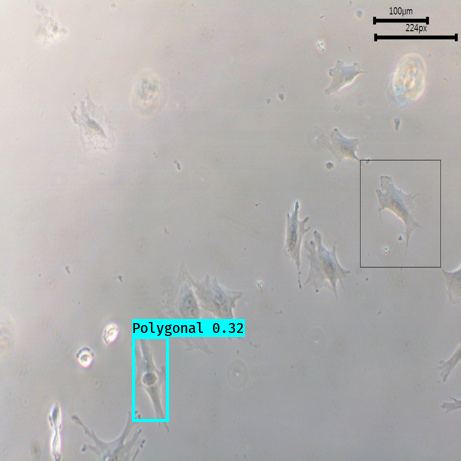

In [39]:

%cd "/content/keras-yolo3"

# do_object_detection('/content/0945.jpg', 'logs/000/ep063-loss69.857-val_loss72.440.h5', 'dental_image_in_voc_format/classes.txt')
do_object_detection('resize_data/JPEGImages/resize_Cell_P1_0017.jpg', 'logs/000/trained_weights_final.h5', 'resize_data/classes.txt')
